# Endothelial cells

This cellular subset was straight forward for annotation. Conventional cell type markers were informative, with the only anomaly being that the largest cluster is made up almost entirely of the same sample (>90% of nuclei), thus warranting its exclusion. 

 - Cluster 0 - Exclude - mostly one sample
 - Cluster 1 - Venous endothelia - VWF, TSHZ2
 - Cluster 2 - Fibroblasts - COL1A1, COL15A1, SLC4A4
 - Cluster 3 - Pericytes - NOTCH3, PDGFRB
 - Cluster 4 - Capillary endothelia - MFSD2A, SLC16A1
 - Cluster 5 - Arterial endothelia - SEMA3G and EFNB2
 - Cluster 6 - Smooth muscle cells - ACTA2


# 1.0 First checks 

In [9]:
import muon as mu
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
pwd

'/nemo/lab/gandhis/home/users/grantpm/teamWood_multiome/panpipes/04a-Cluster_harmony_WNN/split_subclustering/Endothelial/subclustering_endothelial'

In [10]:
mudata = mu.read('Endothelial_clustered.h5mu')

mudata['rna'].obsm['X_umap'] = mudata.obsm['X_umap']
mudata['rna'].obs['mm_leiden_res0.5'] = mudata.obs['leiden_res0.5']

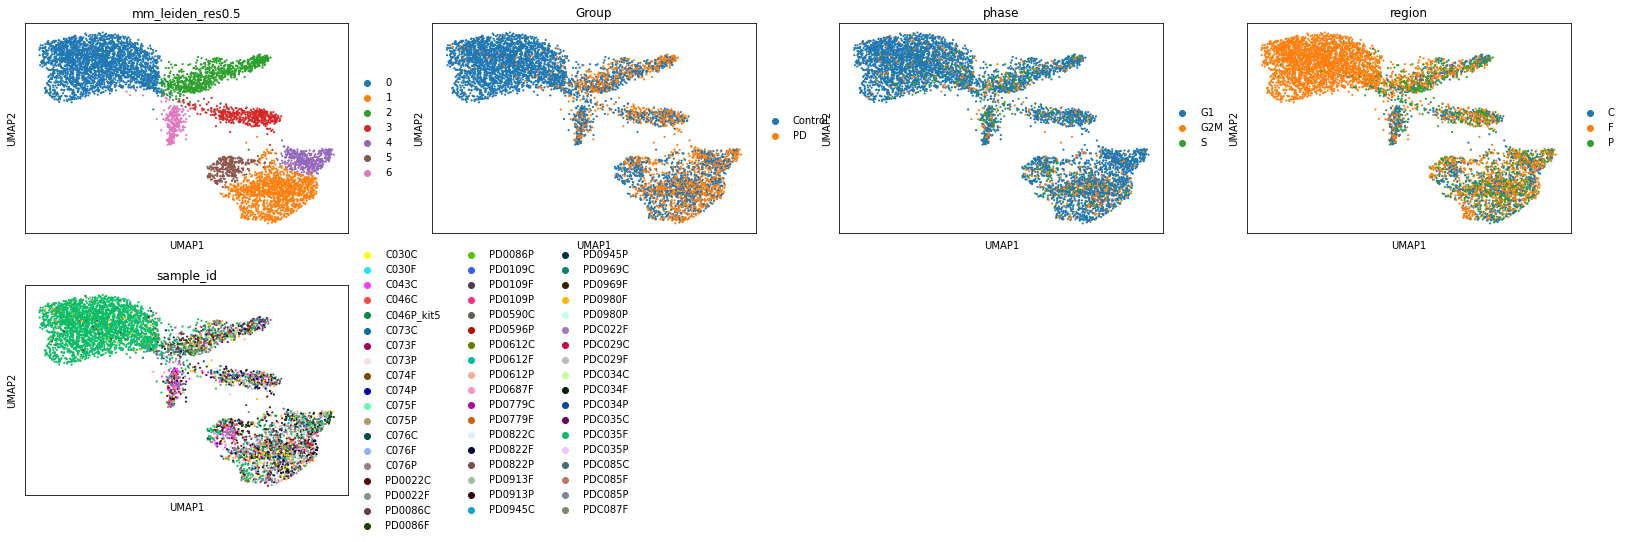

In [11]:
genes = ['mm_leiden_res0.5', 'Group', 'phase', 'region','sample_id']

sc.pl.umap(mudata['rna'], color = genes)

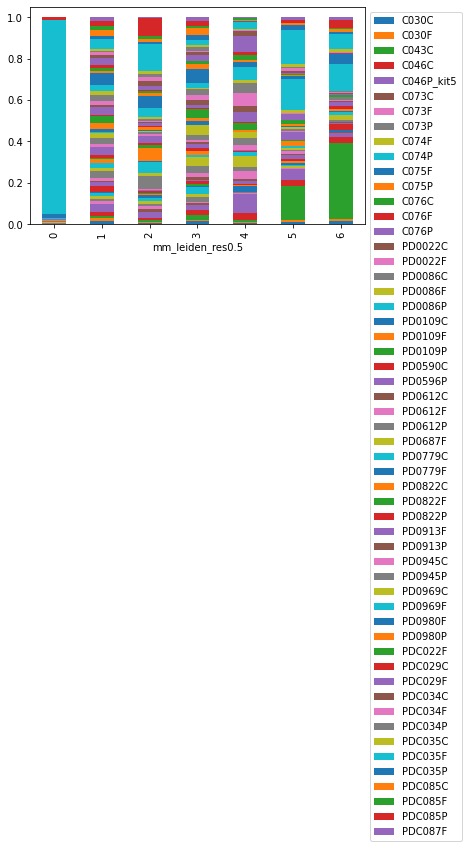

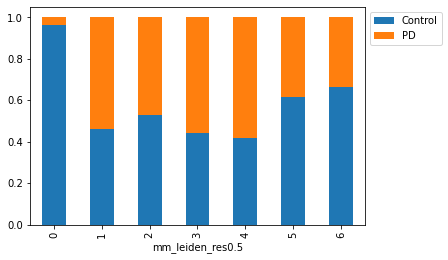

In [12]:
tmp = pd.crosstab(mudata['rna'].obs['mm_leiden_res0.5'],mudata['rna'].obs['sample_id'],normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

tmp = pd.crosstab(mudata['rna'].obs['mm_leiden_res0.5'],mudata['rna'].obs['Group'],normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# 2.0 Check markers

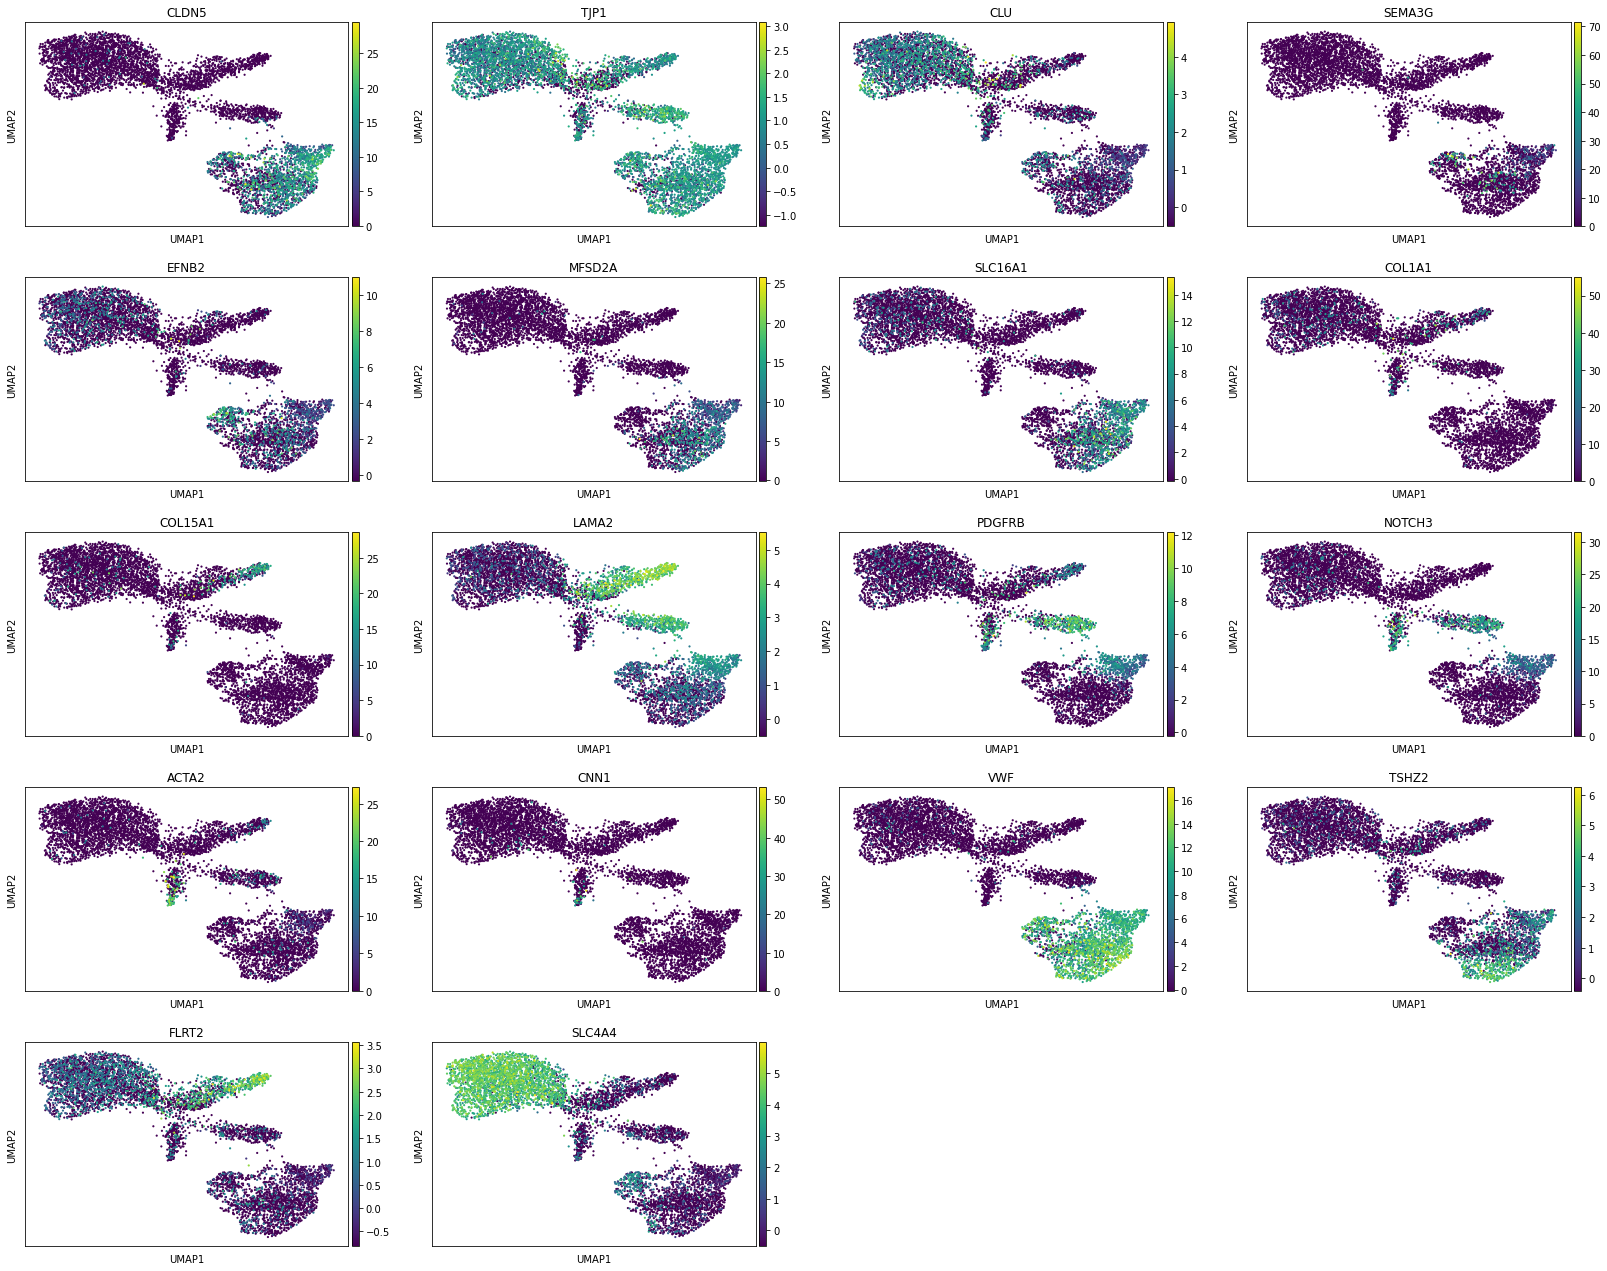

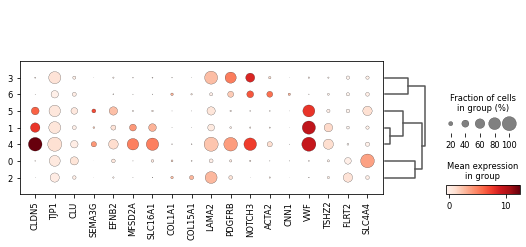

In [13]:
genes = ['CLDN5', 'TJP1', 'CLU', 'SEMA3G', 'EFNB2', 'MFSD2A', 'SLC16A1', 'COL1A1', 'COL15A1', 'LAMA2', 'PDGFRB', 'NOTCH3', 'ACTA2', 'CNN1','VWF', 'TSHZ2', 'FLRT2', 'SLC4A4']


sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

# 3.0 Cluster characterisation (HVGs) 

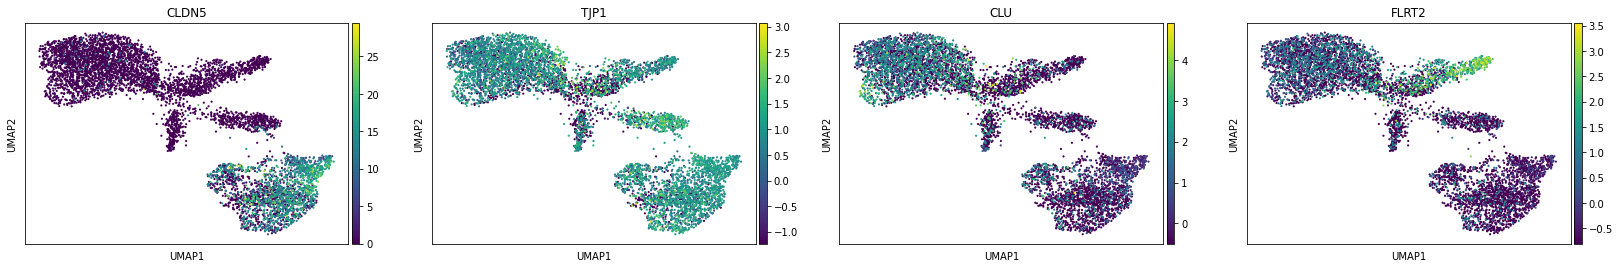

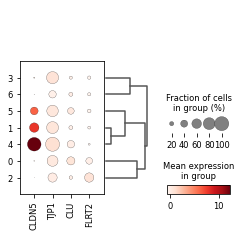

In [14]:
# Cluster 0 - fibroblasts?

genes = ['CLDN5', 'TJP1', 'CLU', 'FLRT2']

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

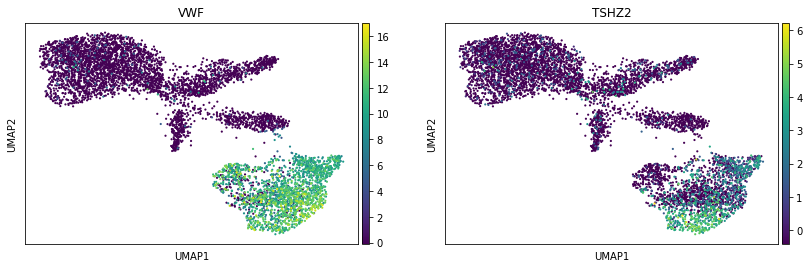

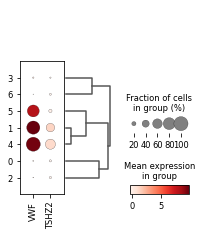

In [15]:
# Cluster 1 - Venous endothelia

genes = ['VWF', 'TSHZ2']

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

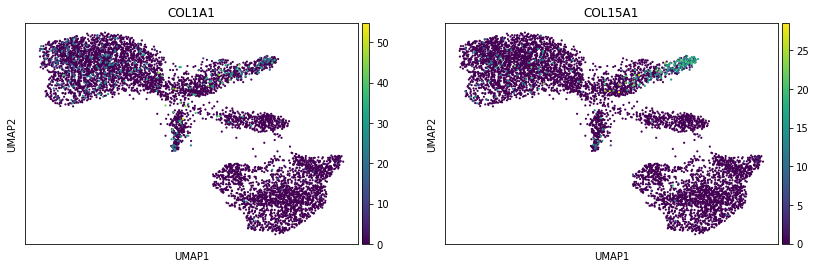

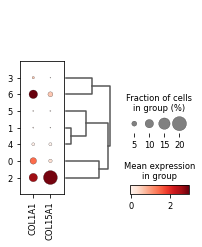

In [16]:
# Cluster 2 - Fibroblasts

genes = ['COL1A1', 'COL15A1']

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

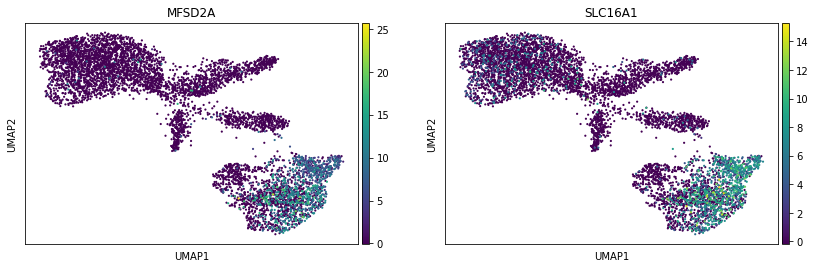

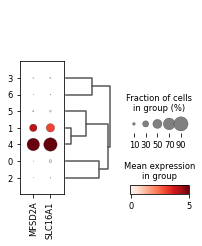

In [17]:
#Cluster 4 - capillary endothelia

genes = ['MFSD2A', 'SLC16A1']

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

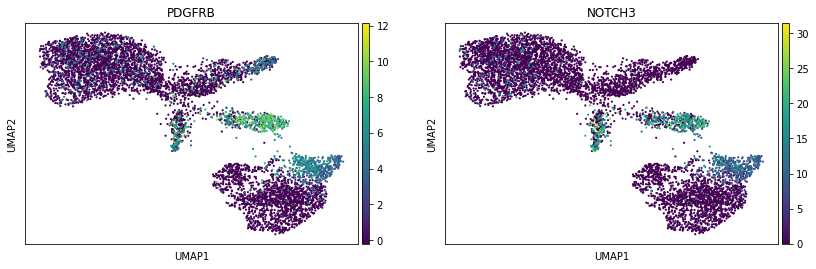

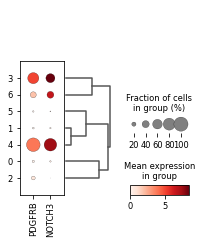

In [18]:
# Cluster 5 pericytes

genes = [ 'PDGFRB', 'NOTCH3']

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

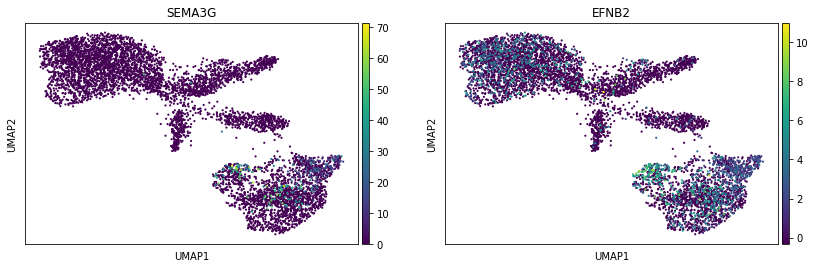

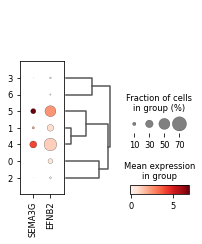

In [19]:
# Cluster 6 arterial endothelia

genes = ['SEMA3G', 'EFNB2']

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

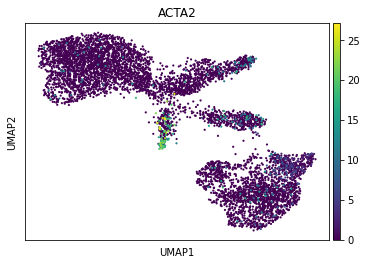

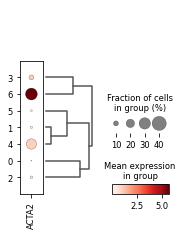

In [20]:
#Cluster 7 - smooth muscle cells

genes = ['ACTA2']

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

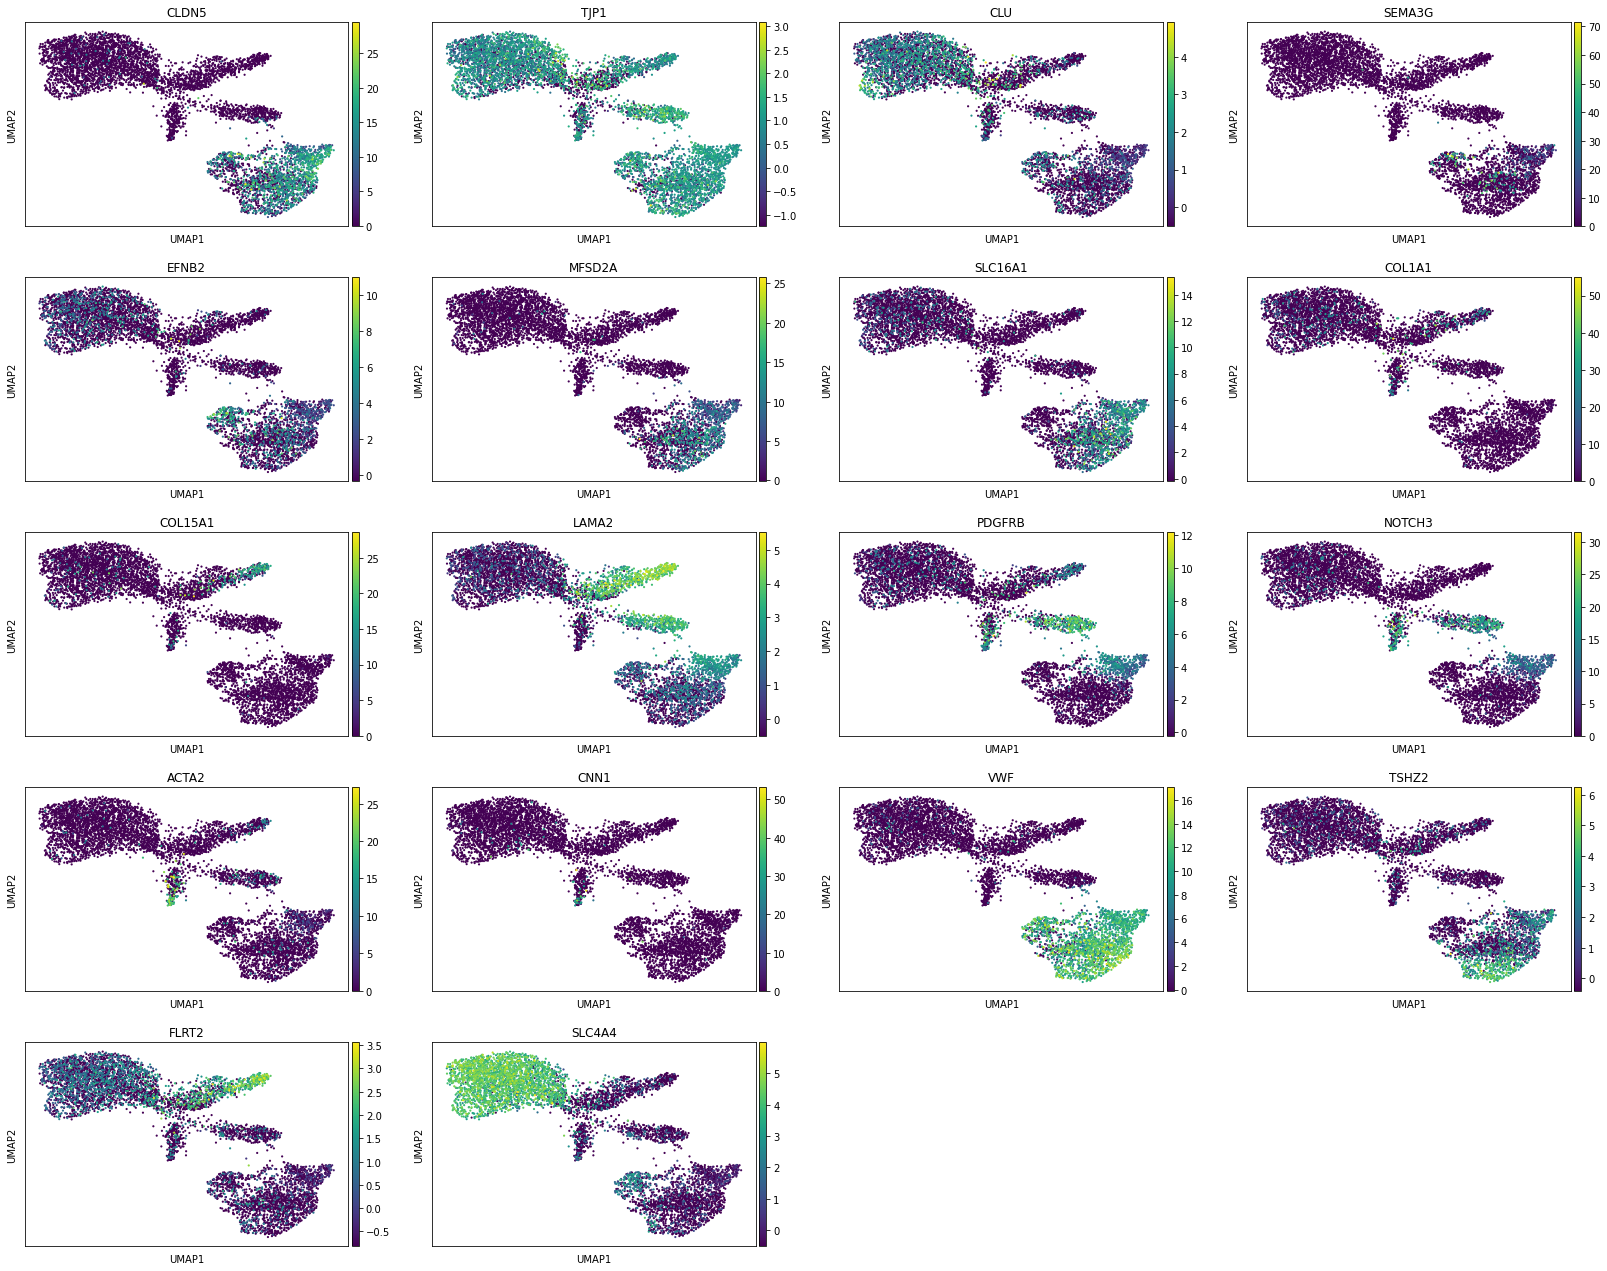

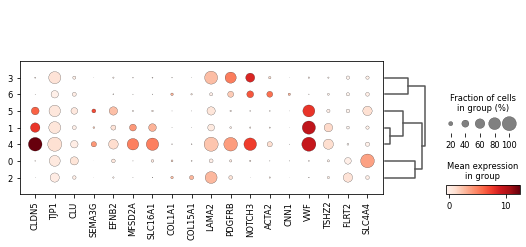

In [21]:
genes = ['CLDN5', 'TJP1', 'CLU', 'SEMA3G', 'EFNB2', 'MFSD2A', 'SLC16A1', 'COL1A1', 'COL15A1', 'LAMA2', 'PDGFRB', 'NOTCH3', 'ACTA2', 'CNN1','VWF', 'TSHZ2', 'FLRT2', 'SLC4A4']

# 0+3 - Fibroblasts - FLRT2 - see Mathys et al Cell 2023
# 1 - Venous endothelia - VWF, TSHZ2
# 2 - Fibroblasts - COL1A1, COL15A1, SLC4A4
# 4 - Capillary endothelia - MFSD2A, SLC16A1
# 5 - Pericytes - PDGFRB, NOTCH3
# 6 - Arterial endothelia - SEMA3G and EFNB2
# 7 - Smooth muscle cells - ACTA2

sc.pl.umap(mudata['rna'], color = genes)

sc.pl.dotplot(mudata['rna'], genes, groupby='mm_leiden_res0.5', dendrogram = True)

# 4.0 Label transfer and final checks

In [22]:
mudata['rna'].obs['annotation_level_0'] = mudata['rna'].obs['mm_leiden_res0.5'].replace({'0' : 'drop',
 '1' : 'Endomural',
 '2' : 'Endomural',
 '3' : 'Endomural',
 '4' : 'Endomural',
 '5' : 'Endomural',
 '6' : 'Endomural'
})

mudata['rna'].obs['annotation_level_1'] = mudata['rna'].obs['mm_leiden_res0.5'].replace({'0' : 'drop',
 '1' : 'Endothelial',
 '2' : 'Fibroblasts',
 '3' : 'Mural',
 '4' : 'Endothelial',
 '5' : 'Endothelial',
 '6' : 'Mural'
})

mudata['rna'].obs['annotation_level_2'] = mudata['rna'].obs['mm_leiden_res0.5'].replace({'0' : 'drop',
 '1' : 'VenousEndothelia_VWF_TSHZ2',
 '2' : 'Fibroblasts_COL1A1_COL15A1_SLC4A4',
 '3' : 'Pericytes_NOTCH3_PDGFRB',
 '4' : 'CapillaryEndothelia_MFSD2A_SLC16A1',
 '5' : 'ArterialEndothelia_SEMA3G_EFNB2',
 '6' : 'SmoothMuscle_ACTA2'
})

In [23]:
mudata['rna'].obs[['annotation_level_0','annotation_level_1','annotation_level_2']].to_csv('../../all_subclustered_annotations/endothelial_annotations.csv')